In [47]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().T.any().any()

False

In [5]:
df.columns = df.columns.str.replace(' ','_')
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

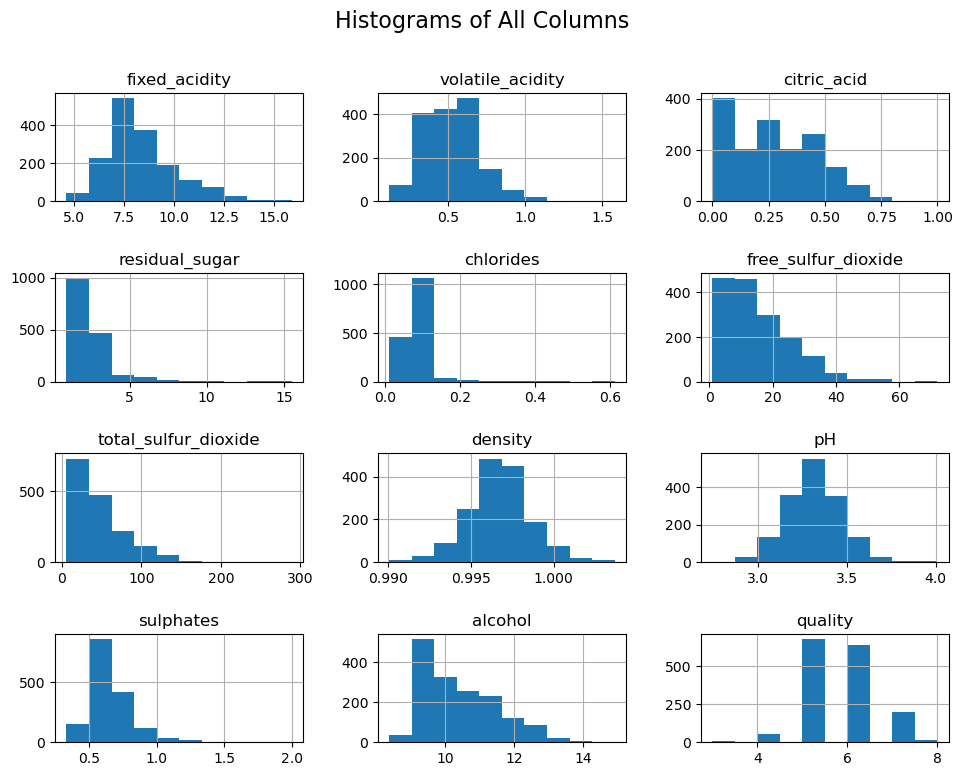

In [6]:
df.hist(figsize=(10,8))
plt.suptitle('Histograms of All Columns', fontsize=16) # Add title
plt.tight_layout(pad=2.0)  # Adjust layout
plt.show()

In [7]:
pd.set_option('display.max_columns',None) # 전체 열 출력
pd.set_option('display.max_rows',None) # 전체 행 출력
col_names = df.columns
for i in range(0,12):
    print(df[col_names[i]].value_counts().sort_index())
    print('\n')

fixed_acidity
4.6      1
4.7      1
4.9      1
5.0      6
5.1      4
5.2      6
5.3      4
5.4      5
5.5      1
5.6     14
5.7      2
5.8      4
5.9      9
6.0     13
6.1     16
6.2     20
6.3     14
6.4     25
6.5     17
6.6     37
6.7     28
6.8     46
6.9     38
7.0     50
7.1     57
7.2     67
7.3     44
7.4     44
7.5     52
7.6     46
7.7     49
7.8     53
7.9     42
8.0     42
8.1     26
8.2     45
8.3     40
8.4     26
8.5     19
8.6     27
8.7     24
8.8     34
8.9     33
9.0     26
9.1     29
9.2     16
9.3     22
9.4     17
9.5     14
9.6     17
9.7      9
9.8     15
9.9     26
10.0    23
10.1    10
10.2    19
10.3    11
10.4    21
10.5    12
10.6    14
10.7    10
10.8    10
10.9     8
11.0     3
11.1     9
11.2     5
11.3     7
11.4     5
11.5    13
11.6    12
11.7     3
11.8     3
11.9    12
12.0     7
12.1     1
12.2     4
12.3     5
12.4     4
12.5     7
12.6     4
12.7     4
12.8     5
12.9     2
13.0     3
13.2     3
13.3     3
13.4     1
13.5     1
13.7     2
13.8   

In [8]:
for i in range(0,11):
    print(col_names[i])
    print(df.groupby('quality')[col_names[i]].describe())
    print('\n')

fixed_acidity
         count      mean       std  min   25%   50%     75%   max
quality                                                          
3         10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6
4         53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5
5        681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9
6        638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3
7        199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6
8         18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6


volatile_acidity
         count      mean       std   min     25%    50%     75%    max
quality                                                               
3         10.0  0.884500  0.331256  0.44  0.6475  0.845  1.0100  1.580
4         53.0  0.693962  0.220110  0.23  0.5300  0.670  0.8700  1.130
5        681.0  0.577041  0.164801  0.18  0.4600  0.580  0.6700  1.330
6        638.0  0.497484  0.160962  0.16  0.3800  0.490  0.6000  1.040
7        199.

In [9]:
df.groupby('quality').agg(['var'])

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides  \
                  var              var         var            var       var   
quality                                                                       
3            3.136000         0.109730    0.062832       1.964472  0.004388   
4            2.645907         0.048448    0.040413       3.202083  0.005805   
5            2.446058         0.027159    0.032401       1.848927  0.002884   
6            3.232260         0.025909    0.038067       2.078141  0.001565   
7            3.969990         0.021090    0.037804       1.881038  0.000868   
8            4.492941         0.021000    0.039810       1.677124  0.000136   

        free_sulfur_dioxide total_sulfur_dioxide   density        pH  \
                        var                  var       var       var   
quality                                                                
3                 95.333333           283.211111  0.000004  0.020751   
4                 81.467344           760.842525  0.000002  0.032921   
5                120.021798          1368.490614  0.000003  0.022686   
6                 98.821718           626.913975  0.000004  0.023714   
7                103.535823          1101.656160  0.000005  0.022530   
8                124.447712           646.849673  0.000006  0.040257   

        sulphates   alcohol  
              var       var  
quality                      
3        0.014889  0.669139  
4        0.057308  0.873806  
5        0.029262  0.542463  
6        0.025170  1.101742  
7        0.018398  0.925315  
8        0.013312  1.498203

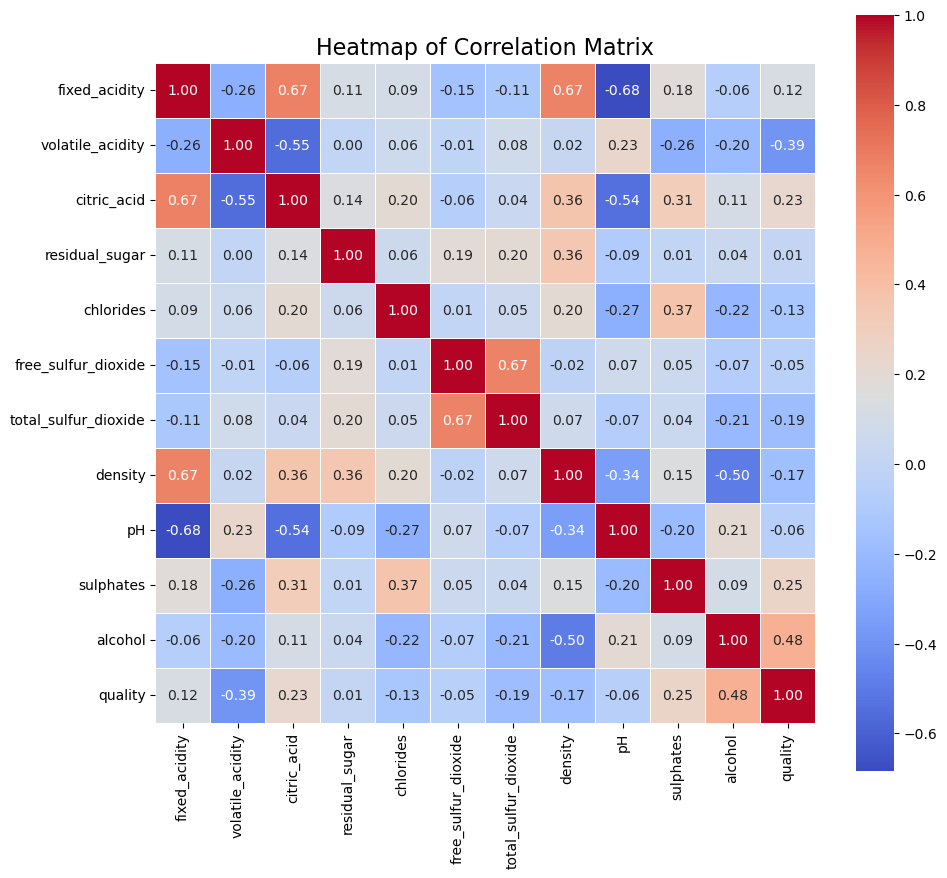

In [10]:
import numpy as np

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)

# Customize the plot
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

In [39]:
correlation_matrix

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.256131     0.671703   
volatile_acidity          -0.256131          1.000000    -0.552496   
citric_acid                0.671703         -0.552496     1.000000   
residual_sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free_sulfur_dioxide       -0.153794         -0.010504    -0.060978   
total_sulfur_dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.114777   0.093705            -0.153794   
volatile_acidity            0.001918   0.061298            -0.010504   
citric_acid                 0.143577   0.203823            -0.060978   
residual_sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free_sulfur_dioxide         0.187049   0.005562             1.000000   
total_sulfur_dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile_acidity                  0.076470  0.022026  0.234937  -0.260987   
citric_acid                       0.035533  0.364947 -0.541904   0.312770   
residual_sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free_sulfur_dioxide               0.667666 -0.021946  0.070377   0.051658   
total_sulfur_dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed_acidity        -0.061668  0.124052  
volatile_acidity     -0.202288 -0.390558  
citric_acid           0.109903  0.226373  
residual_sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free_sulfur_dioxide  -0.069408 -0.050656  
total_sulfur_dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

In [13]:
threshold = 0.4  # Define the threshold for correlation

# Get the pairs of columns with correlation above the threshold
high_corr = correlation_matrix.where((abs(correlation_matrix) > threshold) & (correlation_matrix < 1))  # Ignore self-correlation
high_corr_pairs = high_corr.stack()  # Stack to get pairs

# Display the results
print("Pairs of columns with high correlation :", threshold)
print(high_corr_pairs)

Pairs of columns with high correlation : 0.4
fixed_acidity         citric_acid             0.671703
                      density                 0.668047
                      pH                     -0.682978
volatile_acidity      citric_acid            -0.552496
citric_acid           fixed_acidity           0.671703
                      volatile_acidity       -0.552496
                      pH                     -0.541904
free_sulfur_dioxide   total_sulfur_dioxide    0.667666
total_sulfur_dioxide  free_sulfur_dioxide     0.667666
density               fixed_acidity           0.668047
                      alcohol                -0.496180
pH                    fixed_acidity          -0.682978
                      citric_acid            -0.541904
alcohol               density                -0.496180
                      quality                 0.476166
quality               alcohol                 0.476166
dtype: float64


In [27]:
# Stack the correlation matrix and filter out NaNs
high_corr_pairs = high_corr.stack().reset_index()

# Create a string representation of each pair
high_corr_pairs['pair'] = high_corr_pairs['level_0'] + ',' + high_corr_pairs['level_1']

# Sort the columns lexicographically (to handle reversed pairs)
high_corr_pairs['pair_sorted'] = high_corr_pairs.apply(lambda x: ','.join(sorted([x['level_0'], x['level_1']])), axis=1)

# Drop duplicates based on the sorted pair
unique_pairs = high_corr_pairs.drop_duplicates(subset='pair_sorted')

# Extract the string column
pairs_result = unique_pairs['pair'].tolist()

for pair in pairs_result:
    print(pair)

fixed_acidity,citric_acid
fixed_acidity,density
fixed_acidity,pH
volatile_acidity,citric_acid
citric_acid,pH
free_sulfur_dioxide,total_sulfur_dioxide
density,alcohol
alcohol,quality


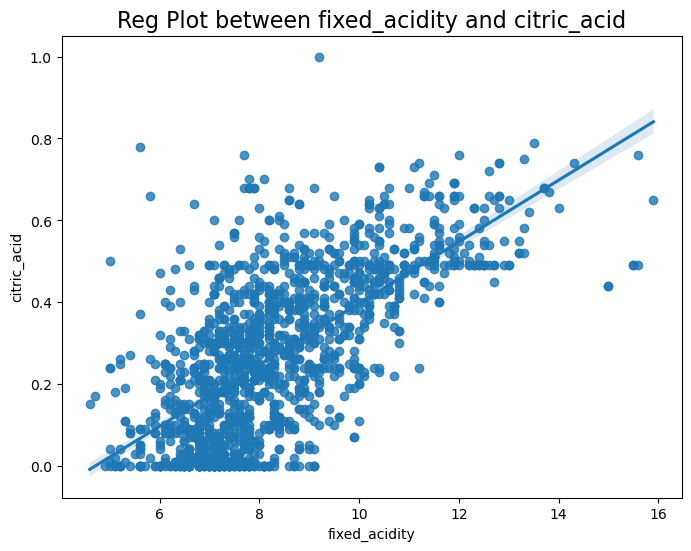

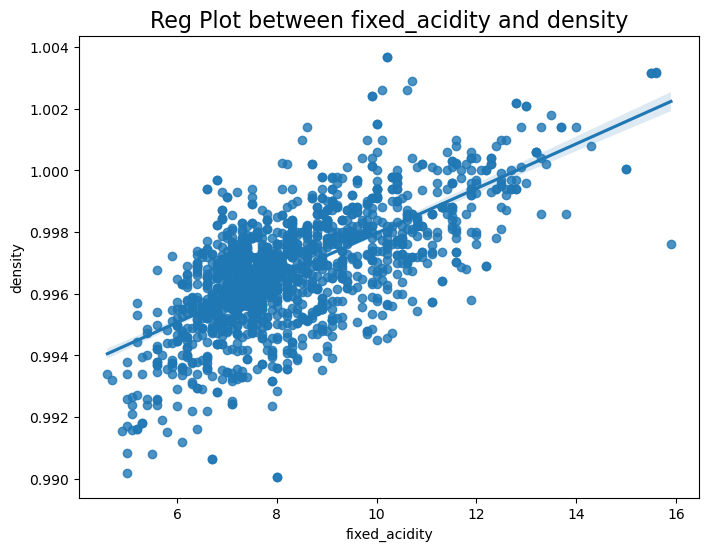

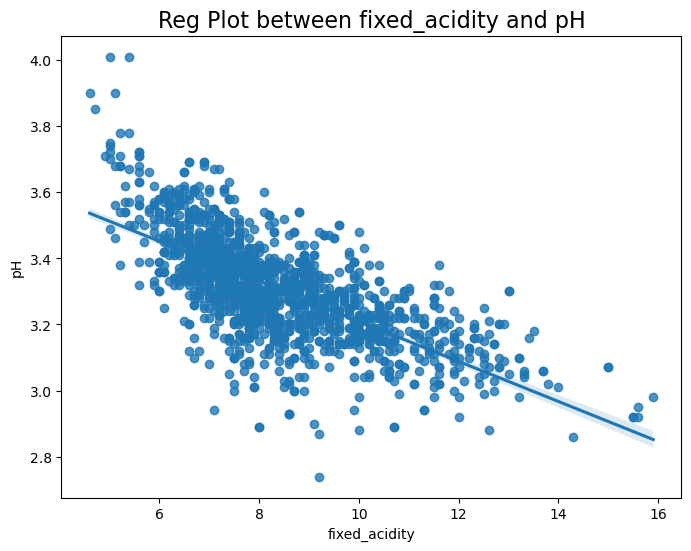

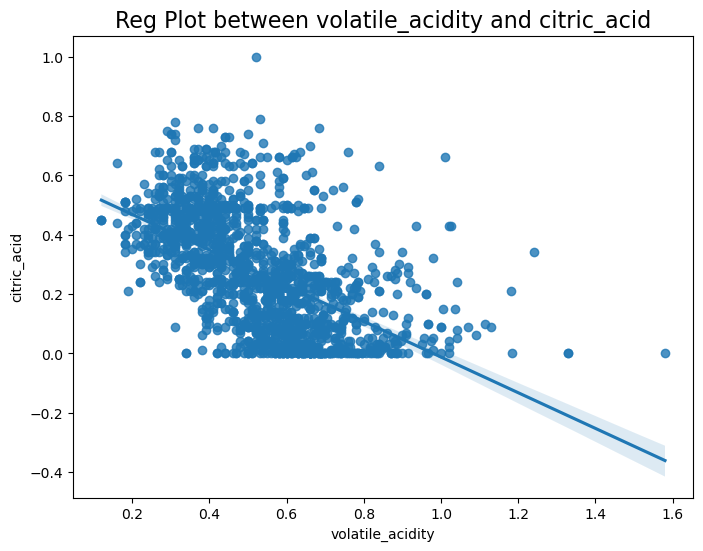

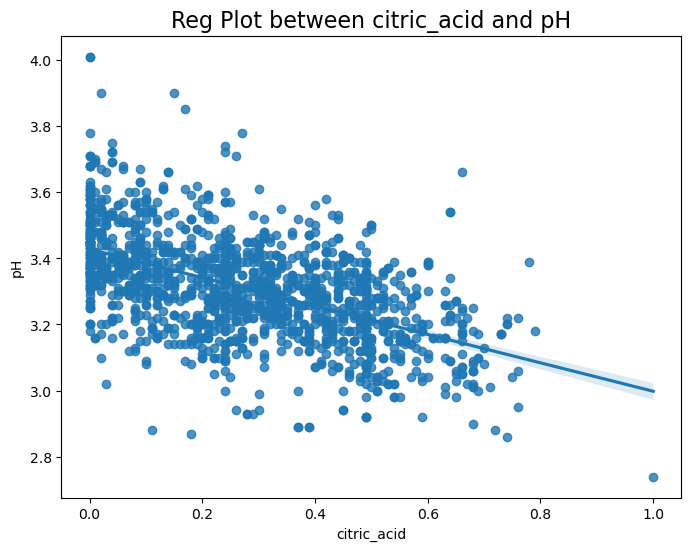

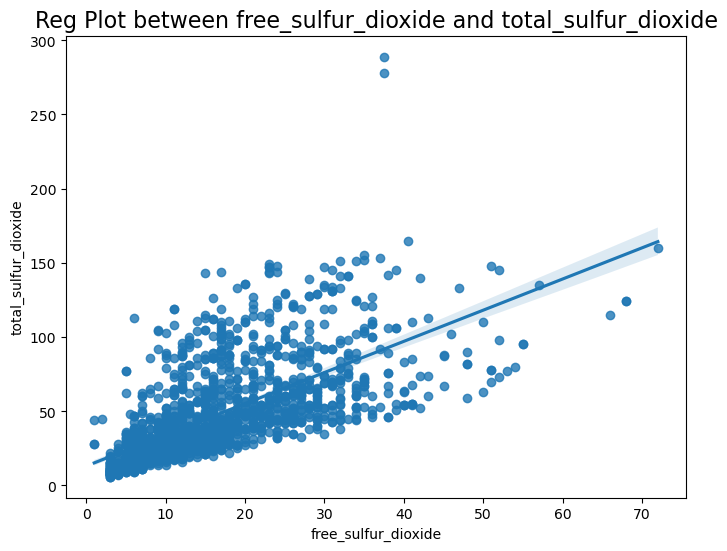

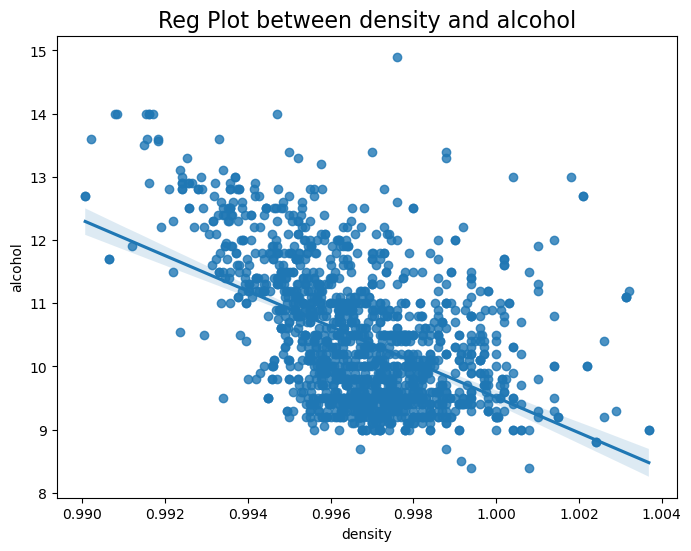

In [51]:
# pairs_result.remove('alcohol,quality')
for pair in pairs_result:
    col_list = pair.split(',')
    col_x = col_list[0]
    col_y = col_list[1]

    # Scatter plot
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.regplot(data=df, x=f'{col_x}', y=f'{col_y}')
    
    # Add labels and title
    plt.xlabel(f'{col_x}')
    plt.ylabel(f'{col_y}')
    plt.title(f'Reg Plot between {col_x} and {col_y}', fontsize=16)
    
    # Show the plot
    plt.show()

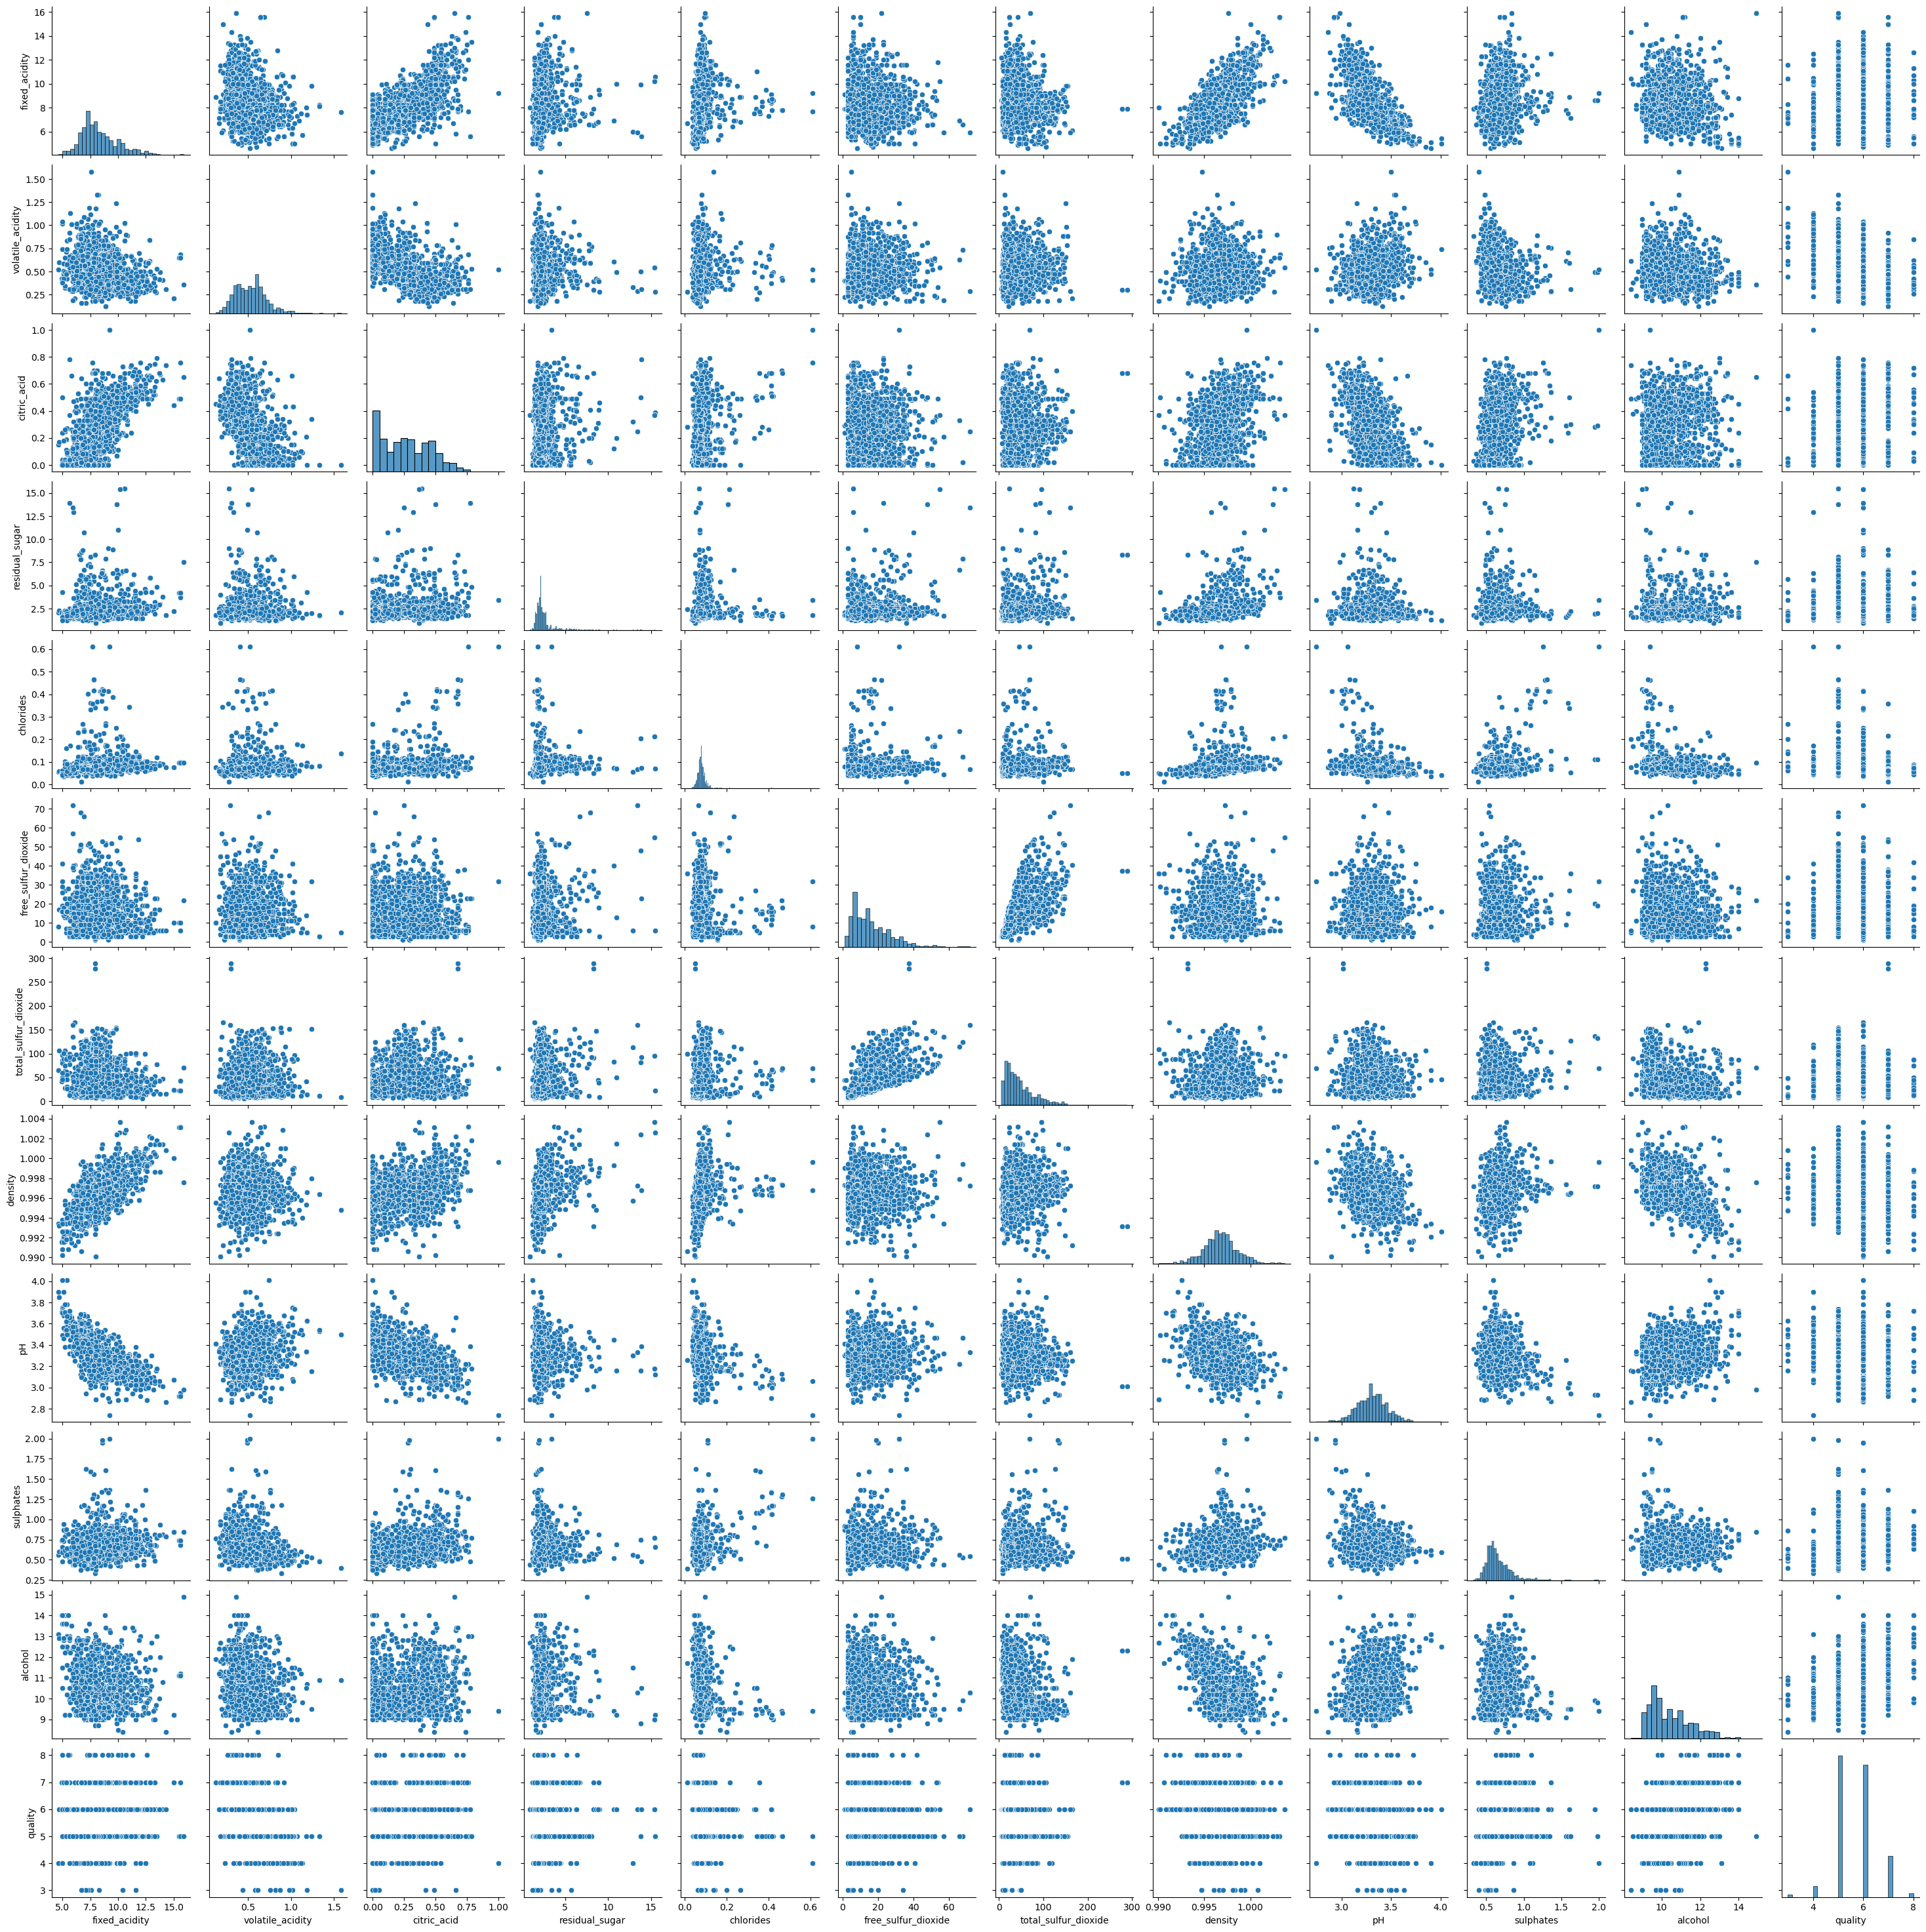

In [29]:
sns.pairplot(df)

In [66]:
X = np.array(df.iloc[:, :-1]) # quality 제외 모든 column 
y = df['quality']

# 교차 검증 - StratifiedKFold
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)

for train_index, test_index in str_kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linear_regression_model = LinearRegression()  
    linear_regression_model.fit(X_train, y_train) 
    
    y_test_predict = linear_regression_model.predict(X_test)
    
    # MSE (평균 제곱 오차) 를 통한 테스트 데이터에서의 모델 성능 판단
    mse = mean_squared_error(y_test, y_test_predict)

    # R-squared (결정 계수) 를 통한 테스트 데이터에서의 모델 성능 판단
    r2 = r2_score(y_test, y_test_predict)
    
    print(f'MSE : {mse}')
    print(f'R-squared : {r2:.2f}')

MSE : 0.46239895636803147
R-squared : 0.28
MSE : 0.4050494688488862
R-squared : 0.38
MSE : 0.44473177376065376
R-squared : 0.32
MSE : 0.4103354996212625
R-squared : 0.38
MSE : 0.40971047167686153
R-squared : 0.37


In [67]:
X = np.array(df.iloc[:, :-1]) # quality 제외 모든 column 
y = df['quality']

# 교차 검증 - KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    linear_regression_model = LinearRegression()  
    linear_regression_model.fit(X_train, y_train) 
    
    y_test_predict = linear_regression_model.predict(X_test)
    
    # MSE (평균 제곱 오차) 를 통한 테스트 데이터에서의 모델 성능 판단
    mse = mean_squared_error(y_test, y_test_predict)

    # R-squared (결정 계수) 를 통한 테스트 데이터에서의 모델 성능 판단
    r2 = r2_score(y_test, y_test_predict)
    
    print(f'MSE : {mse}')
    print(f'R-squared : {r2:.2f}')

MSE : 0.4522433539528478
R-squared : 0.37
MSE : 0.43049706648776526
R-squared : 0.35
MSE : 0.4064413079241428
R-squared : 0.31
MSE : 0.4190850757739007
R-squared : 0.34
MSE : 0.43279598311573453
R-squared : 0.33


Best Alpha: 0.0001
Train RMSE : 0.637857341141029
Test RMSE : 0.6801191617615048
R-squared : 0.28


/var/folders/93/bsx2wbsj4wd9v7zk83626czh0000gp/T/ipykernel_56600/1309184487.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


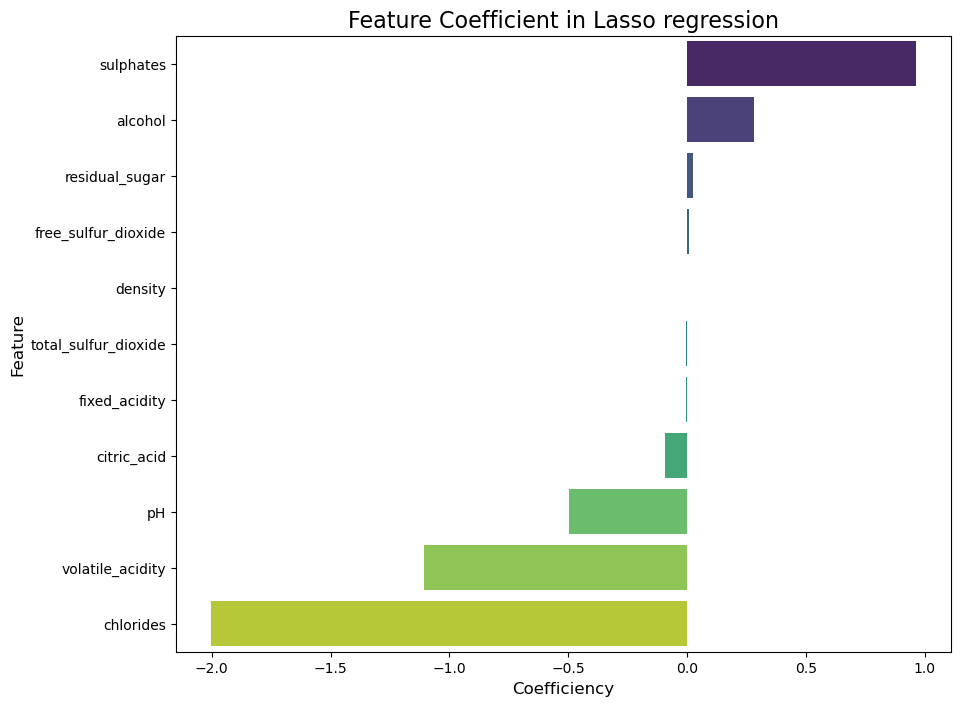

Best Alpha: 0.0001
Train RMSE : 0.6488637326469224
Test RMSE : 0.6365841883063459
R-squared : 0.38


/var/folders/93/bsx2wbsj4wd9v7zk83626czh0000gp/T/ipykernel_56600/1309184487.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


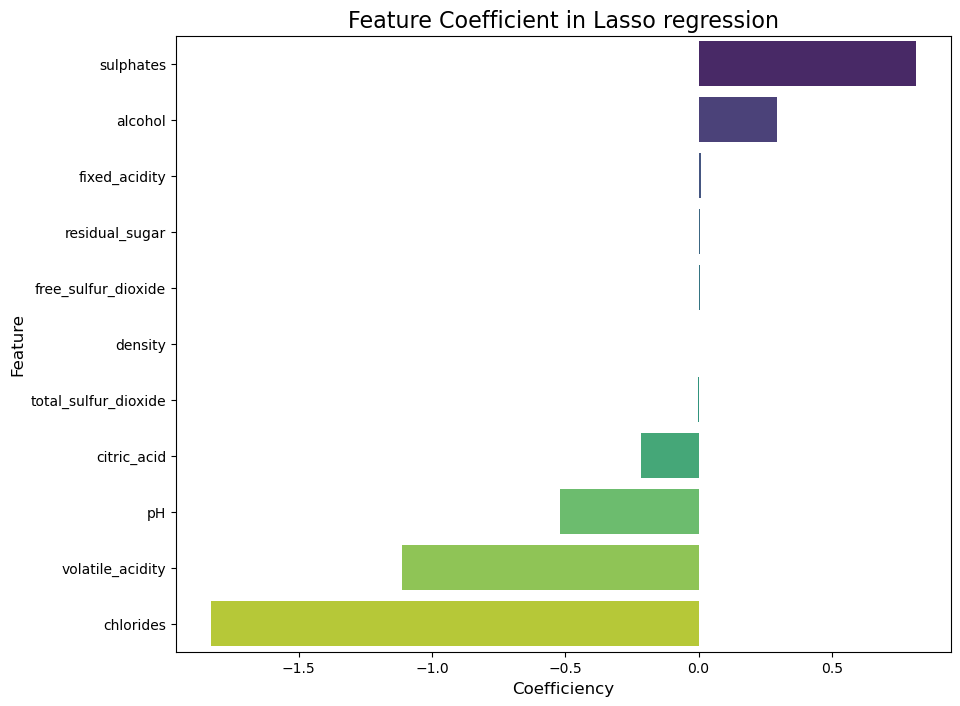

Best Alpha: 1e-05


/var/folders/93/bsx2wbsj4wd9v7zk83626czh0000gp/T/ipykernel_56600/1309184487.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


Train RMSE : 0.6415194576121096
Test RMSE : 0.6661037859666087
R-squared : 0.32


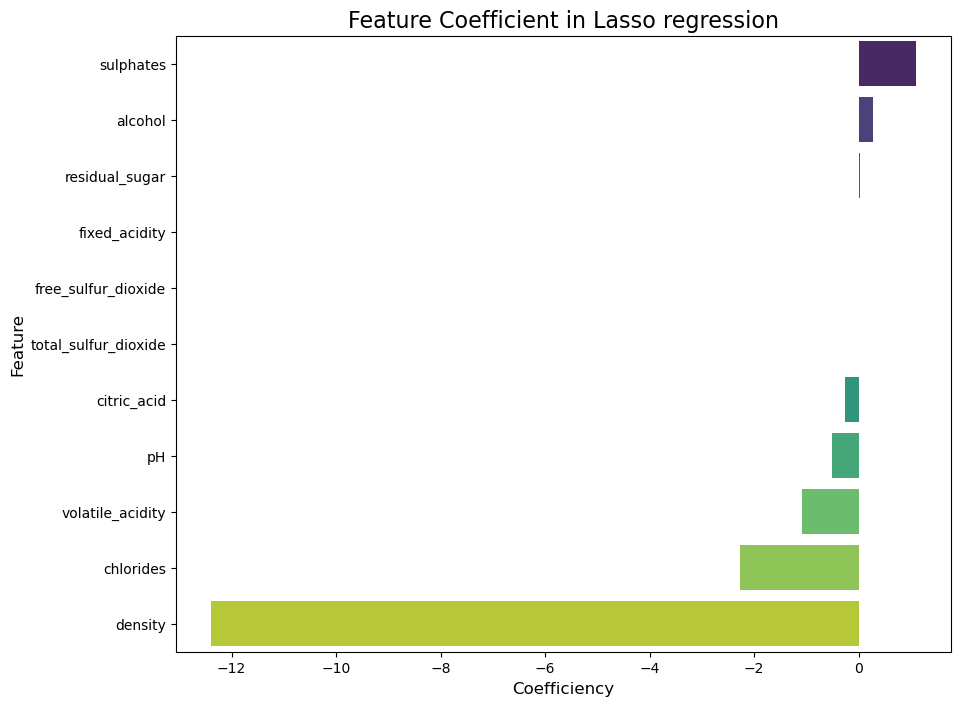

Best Alpha: 0.0001
Train RMSE : 0.6478795214834755
Test RMSE : 0.6395128533269274
R-squared : 0.38


/var/folders/93/bsx2wbsj4wd9v7zk83626czh0000gp/T/ipykernel_56600/1309184487.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


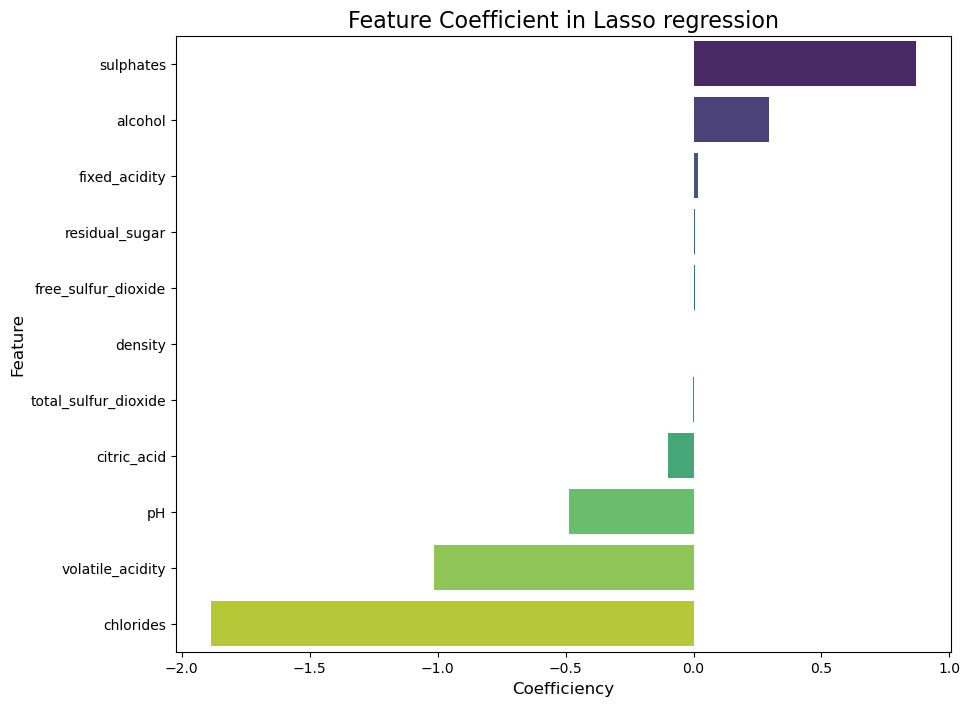

Best Alpha: 0.0001
Train RMSE : 0.6483461581252002
Test RMSE : 0.640319192005974
R-squared : 0.37


/var/folders/93/bsx2wbsj4wd9v7zk83626czh0000gp/T/ipykernel_56600/1309184487.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


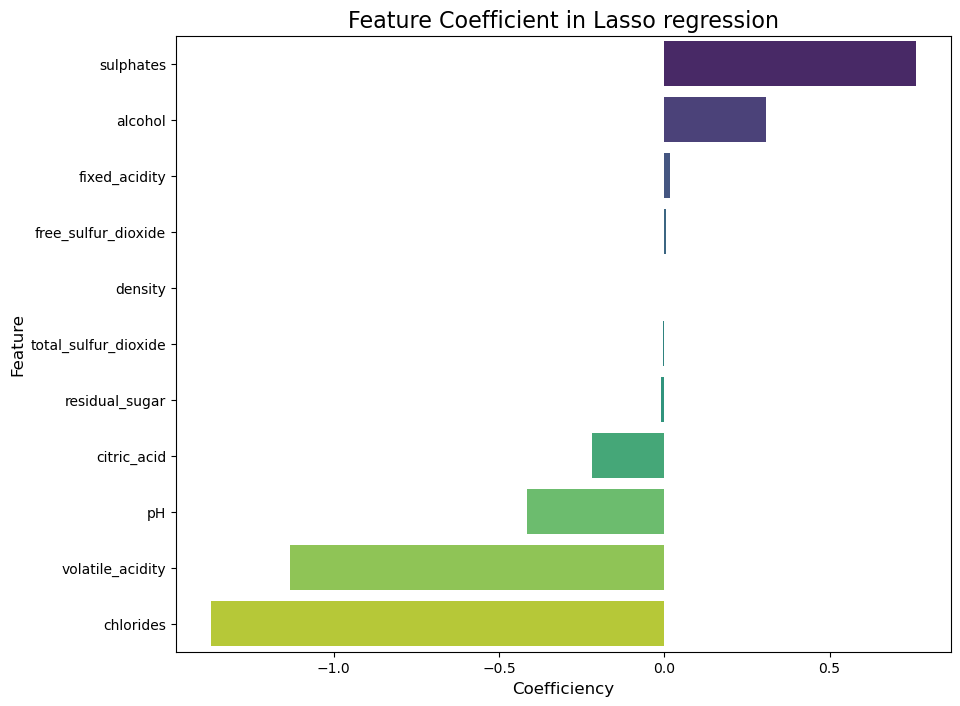

In [74]:
from sklearn.linear_model import LassoCV

X = np.array(df.iloc[:, :-1]) # quality 제외 모든 column 
y = df['quality']

# 교차 검증 - StratifiedKFold
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)

for train_index, test_index in str_kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Automatically find the best alpha
    lasso_cv = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0], cv=5, random_state=42)
    lasso_cv.fit(X_train, y_train)

    # Best alpha
    print(f"Best Alpha: {lasso_cv.alpha_}")
    
    # Predict on the train set
    y_train_predict = lasso_cv.predict(X_train)

    # Predict on the test set
    y_test_predict = lasso_cv.predict(X_test)
    
    # RMSE (평균 제곱근 오차) 를 통한 모델 성능 판단
    train_rmse = (mean_squared_error(y_train, y_train_predict)) ** 0.5
    test_rmse = (mean_squared_error(y_test, y_test_predict)) ** 0.5

    # R-squared (결정 계수) 를 통한 테스트 데이터에서의 모델 성능 판단
    r2 = r2_score(y_test, y_test_predict)
    
    print(f'Train RMSE : {train_rmse}')
    print(f'Test RMSE : {test_rmse}')
    print(f'R-squared : {r2:.2f}')

    coefficients = pd.DataFrame({
        'Feature': col_names[:-1],
        'Coefficient': lasso_cv.coef_
    }).sort_values(by='Coefficient', ascending=False)
     
    # Visualize feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
    plt.title('Feature Coefficient in Lasso regression', fontsize=16)
    plt.xlabel('Coefficiency', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()